# 信号处理仿真与应用 - 数字和模拟滤波器取 - 数字滤波器分析

## impz

#### 滤波器脉冲响应

**给出python函数**

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def impz(b, a=None, *args):
    if a is None:
        # b is SOS matrix or single vector (transfer function)
        if np.ndim(b) == 2 and np.size(b, 1) == 6:
            isTF = False  # SOS matrix
            sos = b
        else:
            isTF = True  # single transfer function vector
            sos = None  # not used in this case
        
        if len(args) > 0:
            n = int(args[0])
        else:
            n = None
        
        if len(args) > 1:
            Fs = float(args[1])
        else:
            Fs = 1.0
    
    else:
        # b and a are coefficient vectors (transfer function)
        isTF = True
        sos = None
        
        n = args[0] if len(args) > 0 else None
        Fs = args[1] if len(args) > 1 else 1.0
    
    # Compute impulse response
    if n is None:
        # Determine length of impulse response automatically
        if isTF:
            impulse_response = signal.impulse((b, a), N=1000)
        else:
            impulse_response = signal.sosfilt(sos, np.array([1] + [0] * 999))
    else:
        # User specified length of impulse response
        impulse_response = np.zeros(n + 1)
        impulse_response[0] = 1
        if isTF:
            impulse_response = signal.lfilter(b, a, impulse_response)
        else:
            impulse_response = signal.sosfilt(sos, impulse_response)
    
    # Compute time vector
    t = np.arange(len(impulse_response)) / Fs
    
    return impulse_response, t

**采用文件调用**

示例1

设计一个归一化通带频率为0.4 rad/样本的四阶低通椭圆滤波器。指定 0.5 dB 的通带纹波和 20 dB 的阻带衰减。绘制脉冲响应的前 50 个样本。

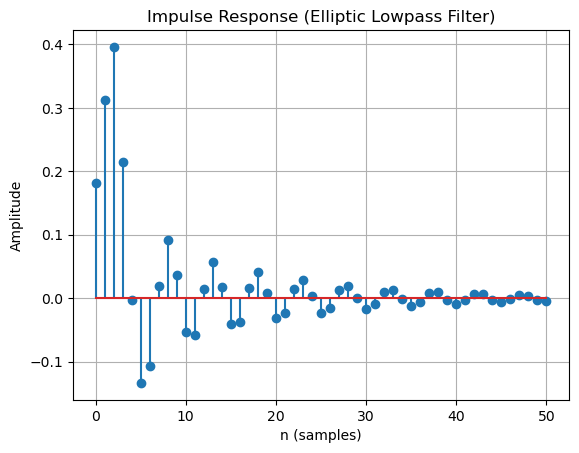

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, firwin, ellip
from impz import impz

# 使用椭圆低通滤波器的示例
N = 4  # 滤波器阶数
rp = 0.5  # 通带纹波(dB)
rs = 20  # 阻带衰减(dB)
fc = 0.4  # 归一化通带频率

# 设计椭圆低通滤波器，返回分子系数 b 和分母系数 a
b, a = ellip(N, rp, rs, fc, 'low', analog=False, output='ba')
num_samples = 50

h, t = impz(b, a, num_samples, 1.0)

# 绘制脉冲响应图
plt.stem(t, h)
plt.title('Impulse Response (Elliptic Lowpass Filter)')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


**采用文件调用**

示例2

使用 Kaiser 窗口设计 18 阶的 FIR 高通滤波器，其中*β*=4，指定 100 Hz 的采样率和 30 Hz 的截止频率，显示滤波器的脉冲响应。

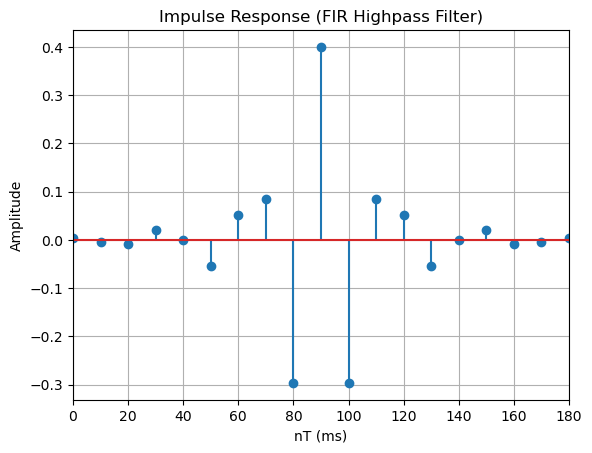

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, firwin, ellip
from impz import impz

# 使用 FIR 高通滤波器的示例
order = 18  # 滤波器阶数
fs = 100  # 采样率 (Hz)
cutoff_freq = 30  # 截止频率 (Hz)
beta = 4  # Kaiser 窗口的β值

# 使用 firwin 函数设计 FIR 高通滤波器
b = firwin(order + 1, cutoff_freq / (fs / 2), pass_zero=False, window=('kaiser', beta))
num_samples = 100

# 使用 calculate_impulse_response 函数计算滤波器的脉冲响应和时间序列
h, t = impz(b, 1, num_samples, 1.0)

# 绘制脉冲响应图
plt.stem(t * 10, h)
plt.title('Impulse Response (FIR Highpass Filter)')
plt.xlim(0, 180)
plt.xlabel('nT (ms)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()